In [1]:
import dill
dill.load_session('sessions/extract_colors.pkl')

EOFError: Ran out of input

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans


class MyImage:
    def __init__(self, img_path):
        self.img_path = img_path
        self.img = cv2.imread(img_path)
    def get_shape(self, img):
        return img.shape
    def show(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    def rbg_to_hex(arr):
        return "#{:02x}{:02x}{:02x}".format(int(arr[0]), int(arr[1]), int(arr[2]))
    def get_resized_img(self, img, new_height, new_width):
        resized_img = cv2.resize(img, (new_height, new_width), interpolation = cv2.INTER_AREA)
        self.resized_img = resized_img
        return resized_img
    def get_reshaped_img(self, img):
        reshaped_img = img.reshape(img.shape[0]*img.shape[1], 3)
        self.reshaped_img = reshaped_img
        return reshaped_img


class ColorDetection:
    def get_kmeans_clf(self, reshaped_img, number_of_colors=3):
        """reshaped_img must be of 2 dim"""
        clf = KMeans(n_clusters = number_of_colors)
        self.labels = clf.fit_predict(reshaped_img)
        return clf
    def get_best_kmeans_clf(self, reshaped_img, max_number_of_colors=10):
        """reshaped_img must be of 2 dim"""
        best_number_of_neighbors = self.get_best_number_of_neighbors(max_number_of_colors, reshaped_img)
        clf = KMeans(n_clusters=best_number_of_neighbors)
        self.labels = clf.fit_predict(reshaped_img)
        return clf
    def get_best_number_of_neighbors(max_neighbors, reshaped_img):
        inertia_list = []
        for i in range(1, max_neighbors+1):
            clf = KMeans(n_clusters=max_neighbors)
            clf.fit(reshaped_img)
            inertia_list.append(clf.inertia_)
        best_number_of_neighbors = inertia_list.index(min(inertia_list)) + 1
        return best_number_of_neighbors
    def get_color_cluster_centers(self, clf):
        """clf = KMeans classifier"""
        cluster_centers = clf.cluster_centers_ # https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
        return cluster_centers
    def show_palette(self, rgb_arr_list):
        """rgb_arr_list = cluster_centers here"""
        scaled_colours = [[color / 255 for color in row] for row in rgb_arr_list]
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.axis(xmin=0, xmax=len(scaled_colours))
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for index, colour in enumerate(scaled_colours):
            ax.axvspan(index, index + 1, color=colour)
    def get_mean_center(self, cluster_centers):
        mean_center = sum(cluster_centers)/len(cluster_centers)
        self.mean_center = mean_center
        return mean_center


def image_to_rgb_mean(MyImage, ColorDetection, img_path, number_of_colors=3):
    mim = MyImage(img_path)
    print(mim.get_shape(mim.img))
    resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
    mim.show(resized_img)
    reshaped_img = mim.get_reshaped_img(resized_img)
    
    cd = ColorDetection()
    clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
    cluster_centers = cd.get_color_cluster_centers(clf)
    mean_center = sum(cluster_centers)/len(cluster_centers)
    return mean_center


def image_to_rgb_list(MyImage, ColorDetection, img_path, number_of_colors=3):
    mim = MyImage(img_path)
    print(mim.get_shape(mim.img))
    resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
    mim.show(resized_img)
    reshaped_img = mim.get_reshaped_img(resized_img)
    
    cd = ColorDetection()
    clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
    cluster_centers = cd.get_color_cluster_centers(clf)
    return cluster_centers
    
    

(467, 566, 3)
[96.52058731 99.05539379 88.15533642]


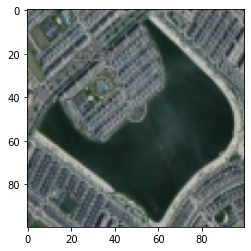

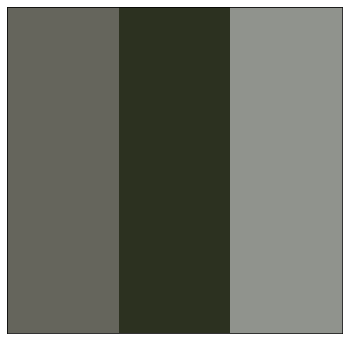

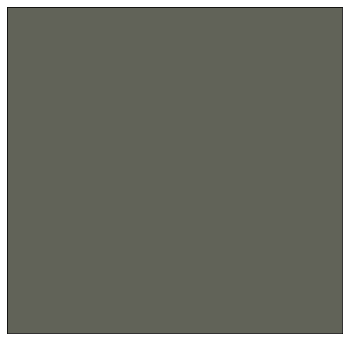

In [79]:
img_path = './img/lake/1.png'
mim = MyImage(img_path)
print(mim.get_shape(mim.img))
mim.show(mim.img)

resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
mim.show(resized_img)
reshaped_img = mim.get_reshaped_img(resized_img)

cd = ColorDetection()
clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=3)
cluster_centers = cd.get_color_cluster_centers(clf)
cd.show_palette(cluster_centers)

mean_center = sum(cluster_centers)/len(cluster_centers)
print(mean_center)
cd.show_palette([mean_center])

(591, 620, 3)
[71.95301726 82.63402785 74.18658398]
[[ 45.95550062  53.47960445  34.93621755]
 [ 96.47082276 108.06234143 108.94237042]
 [ 73.43272841  86.36013767  78.68116395]]


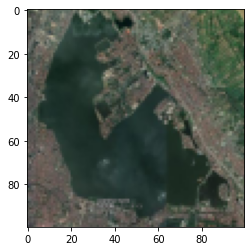

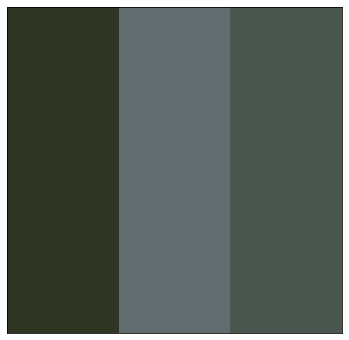

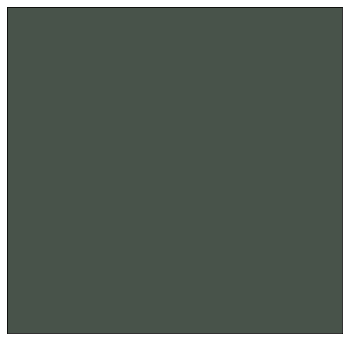

In [81]:
img_path = './img/lake/2.png'
mim2 = MyImage(img_path)
print(mim2.get_shape(mim2.img))
# mim2.show(mim2.img)
resized_img = mim2.get_resized_img(mim2.img, new_height=100, new_width=100)
mim2.show(resized_img)
reshaped_img = mim2.get_reshaped_img(resized_img)


cd = ColorDetection()
clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=3)
cluster_centers = cd.get_color_cluster_centers(clf)
cd.show_palette(cluster_centers)

mean_center = sum(cluster_centers)/len(cluster_centers)
print(mean_center)
cd.show_palette([mean_center])
print(cluster_centers)

(623, 281, 3)
[77.75300884 82.92754311 74.5362934 ]
[[ 44.44484305  48.54618834  34.23049327]
 [120.51311475 121.80819672 131.42540984]
 [ 68.3010687   78.42824427  57.9529771 ]]


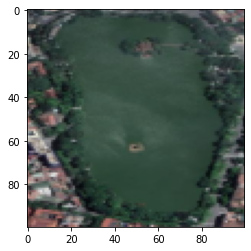

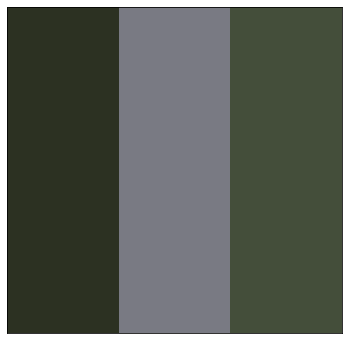

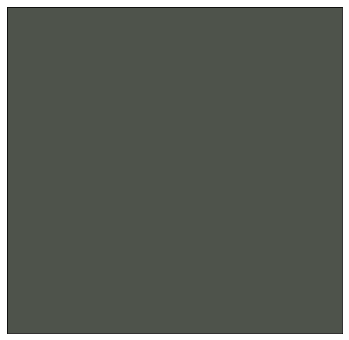

In [83]:
img_path = './img/lake/3.png'
mim3 = MyImage(img_path)
print(mim3.get_shape(mim3.img))
# mim3.show(mim3.img)
resized_img = mim3.get_resized_img(mim3.img, new_height=100, new_width=100)
mim3.show(resized_img)
reshaped_img = mim3.get_reshaped_img(resized_img)


cd = ColorDetection()
clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=3)
cluster_centers = cd.get_color_cluster_centers(clf)
cd.show_palette(cluster_centers)

mean_center = sum(cluster_centers)/len(cluster_centers)
print(mean_center)
cd.show_palette([mean_center])
print(cluster_centers)

(242, 327, 3)
[78.26445256 87.65630118 68.96391413]
[79.16827178 87.14004945 70.33926038]
[[ 52.35526928  59.80893993  43.07294738]
 [ 72.81122272  83.92414271  59.89192934]
 [109.62686567 119.2358209  103.92686567]]
[[ 56.01484561  64.21971496  47.09540776]
 [ 94.69664634 109.28353659  86.26067073]
 [ 72.75637755  83.80272109  59.20705782]
 [128.90376569 129.38075314 126.12552301]
 [ 43.46972369  49.01352146  33.00764256]]


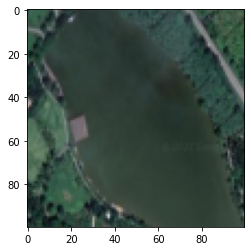

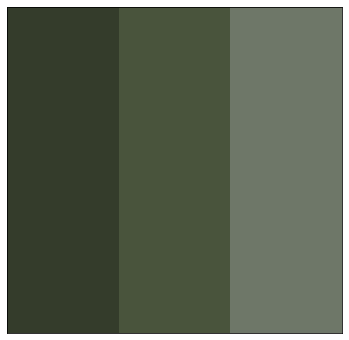

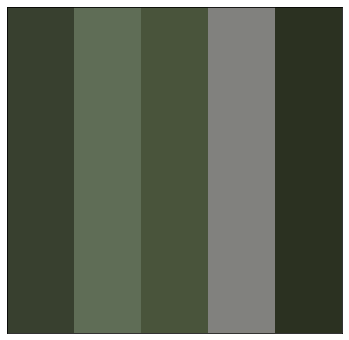

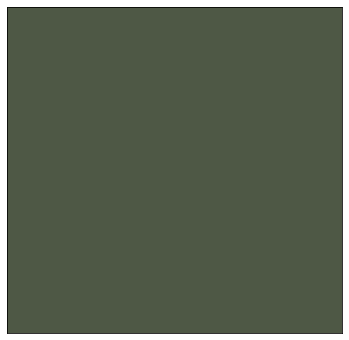

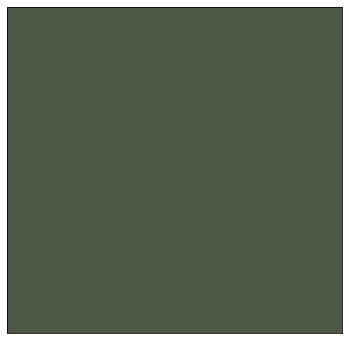

In [96]:
img_path = './img/lake/4.png'
mim4 = MyImage(img_path)
print(mim4.get_shape(mim4.img))
# mim4.show(mim4.img)
resized_img = mim4.get_resized_img(mim4.img, new_height=100, new_width=100)
mim4.show(resized_img)
reshaped_img = mim4.get_reshaped_img(resized_img)


cd = ColorDetection()
clf5 = cd.get_kmeans_clf(reshaped_img, number_of_colors=5)
clf3 = cd.get_kmeans_clf(reshaped_img, number_of_colors=3)
cluster_centers3 = cd.get_color_cluster_centers(clf3)
cluster_centers5 = cd.get_color_cluster_centers(clf5)
cd.show_palette(cluster_centers3)
cd.show_palette(cluster_centers5)

mean_center3 = sum(cluster_centers3)/len(cluster_centers3)
print(mean_center3)
cd.show_palette([mean_center3])
mean_center5 = sum(cluster_centers5)/len(cluster_centers5)
print(mean_center5)
cd.show_palette([mean_center5])
print(cluster_centers3)
print(cluster_centers5)

(242, 327, 3)
mean3= [42.16908748 47.23269981 37.81325825]
[[73.25050302 80.34104628 67.27867203]
 [ 0.44056525  0.45358825  0.39567747]
 [52.81619418 60.90346489 45.76542524]]
mean5= [56.10445846 60.47458581 52.46020669]
[[  0.31328321   0.32080201   0.28292955]
 [ 55.22283814  63.56374723  48.02854767]
 [ 67.5992714   75.96448087  60.76684882]
 [111.4        109.27       114.        ]
 [ 45.98689956  53.25389894  39.22270742]]
mean10= [65.1877602  70.33787245 63.21115436]
[[5.67614270e+01 6.54632107e+01 4.96861761e+01]
 [9.72104818e-02 9.91828684e-02 8.79120879e-02]
 [1.13729730e+02 1.09229730e+02 1.15945946e+02]
 [4.49387569e+01 5.24305302e+01 3.84442413e+01]
 [8.59487179e+01 9.05384615e+01 8.21153846e+01]
 [5.22557471e+01 5.99750958e+01 4.48275862e+01]
 [6.25905006e+01 7.19281130e+01 5.62708601e+01]
 [2.40588235e+01 2.51294118e+01 2.12588235e+01]
 [1.40333333e+02 1.50000000e+02 1.60333333e+02]
 [7.11633554e+01 7.85849890e+01 6.31412804e+01]]
mean20= [60.34063831 66.11312937 56.3812

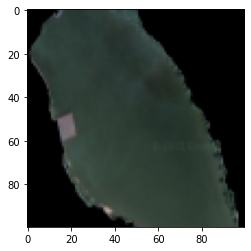

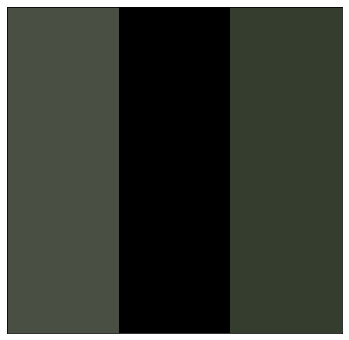

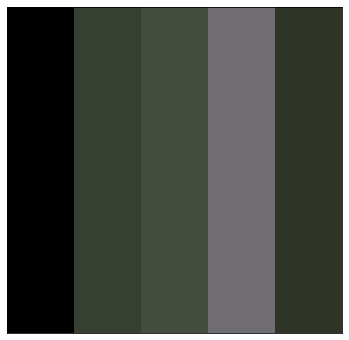

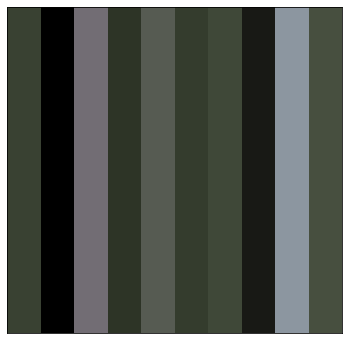

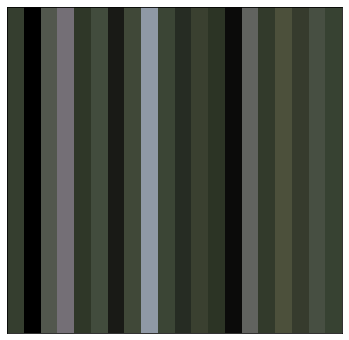

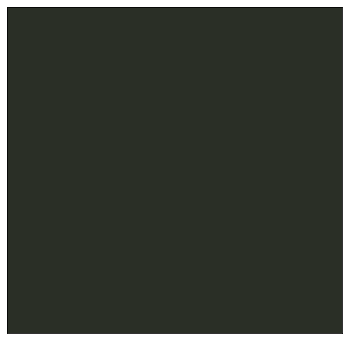

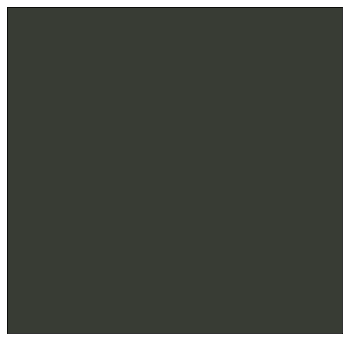

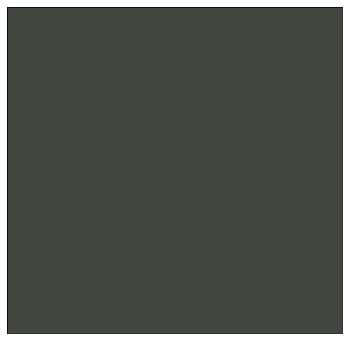

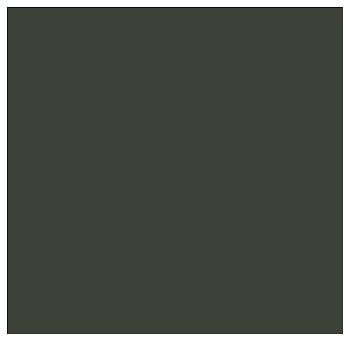

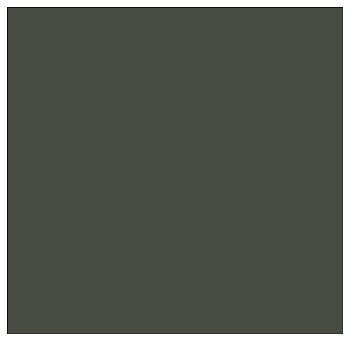

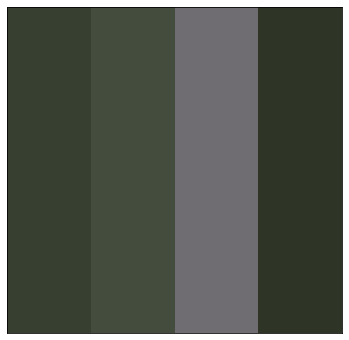

In [109]:
img_path = './img/lake/sample.png'
mim5 = MyImage(img_path)
print(mim5.get_shape(mim5.img))
# mim5.show(mim5.img)
resized_img = mim5.get_resized_img(mim5.img, new_height=100, new_width=100)
mim5.show(resized_img)
reshaped_img = mim5.get_reshaped_img(resized_img)


cd = ColorDetection()
clf20 = cd.get_kmeans_clf(reshaped_img, number_of_colors=20)
clf10 = cd.get_kmeans_clf(reshaped_img, number_of_colors=10)
clf5 = cd.get_kmeans_clf(reshaped_img, number_of_colors=5)
clf3 = cd.get_kmeans_clf(reshaped_img, number_of_colors=3)
cluster_centers3 = cd.get_color_cluster_centers(clf3)
cluster_centers5 = cd.get_color_cluster_centers(clf5)
cluster_centers10 = cd.get_color_cluster_centers(clf10)
cluster_centers20 = cd.get_color_cluster_centers(clf20)
cd.show_palette(cluster_centers3)
cd.show_palette(cluster_centers5)
cd.show_palette(cluster_centers10)
cd.show_palette(cluster_centers20)

mean_center3 = sum(cluster_centers3)/len(cluster_centers3)
print('mean3=', mean_center3)
cd.show_palette([mean_center3])
print(cluster_centers3)
mean_center5 = sum(cluster_centers5)/len(cluster_centers5)
print('mean5=', mean_center5)
cd.show_palette([mean_center5])
print(cluster_centers5)
mean_center10 = sum(cluster_centers10)/len(cluster_centers10)
print('mean10=', mean_center10)
cd.show_palette([mean_center10])
print(cluster_centers10)
mean_center20 = sum(cluster_centers20)/len(cluster_centers20)
print('mean20=', mean_center20)
cd.show_palette([mean_center20])
print(cluster_centers20)

new_cluster_center5 = []
for cc in cluster_centers5:
    if sum(cc) >= 10:
        new_cluster_center5.append(cc)
print(new_cluster_center5)
new_mean_center5 = sum(new_cluster_center5)/len(new_cluster_center5)
print('new')
print('newmean5=', new_mean_center5)
cd.show_palette([new_mean_center5])
cd.show_palette(new_cluster_center5)


In [93]:
import pandas as pd

arr = []
arr.append(mean_center)
df = pd.DataFrame(arr, columns=['r', 'g', 'b'])
df['label'] = 'lake'
df

,r,g,b,label
0,78.132482,87.527893,68.805308,lake


(591, 620, 3)


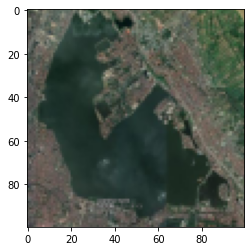

In [14]:
img_path = './img/lake/2.png'
mim = MyImage(img_path)
print(mim.get_shape(mim.img))
mim.show(mim.img)

resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
mim.show(resized_img)
reshaped_img = mim.get_reshaped_img(resized_img)

In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def get_best_number_of_neighbors(max_neighbors, reshaped_img):
    inertia_list = []
    for i in range(1, max_neighbors+1):
        clf = KMeans(n_clusters=max_neighbors)
        clf.fit(reshaped_img)
        inertia_list.append(clf.inertia_)
    
    best_number_of_neighbors = inertia_list.index(min(inertia_list)) + 1
    return best_number_of_neighbors

get_best_number_of_neighbors(10, reshaped_img)
# number_of_colors, inertia_list = get_best_number_of_neighbors(10)
# neighbors = [i for i in range(1, number_of_colors+1)]
# plt.plot(neighbors, inertia_list)
# plt.ylabel("Inertia")
# plt.xlabel("Number Of Neighbors")
# plt.xticks(neighbors)
# plt.show()



6

In [ ]:
import dill
dill.load_session('sessions/extract_colors_oop.pkl')

In [103]:
import dill
dill.dump_session('sessions/extract_colors_oop.pkl')